In [1]:
import requests
import pandas as pd

# URL base de Socrata (dataset de lesiones personales y accidentes de tránsito en Colombia)
url = "https://www.datos.gov.co/resource/72sg-cybi.json"

# Tu App Token (opcional)
app_token = None  # Reemplazar token o dejar como None

# Configurar encabezados para la solicitud
headers = {
    "X-App-Token": app_token
} if app_token else {}

In [2]:
# Parámetros para filtrar los datos
params = {
    "$limit": 5000,  # Limitar a 5000 resultados (cambiar según necesidades)
}

# Realizar la solicitud GET
response = requests.get(url, headers=headers, params=params)

# Verificar el estado de la respuesta
if response.status_code == 200:
    datos = response.json()
    print("Datos recibidos exitosamente.")
else:
    print(f"Error al acceder a la API: {response.status_code}")
    datos = []

Datos recibidos exitosamente.


In [3]:
# Convertir los datos a un DataFrame
if datos:
    df = pd.DataFrame(datos)
    print("Primeras filas del DataFrame:")
    display(df.head())
else:

    print("No se recibieron datos.")

Primeras filas del DataFrame:


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,descripci_n_conducta,cantidad
0,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ALIMENTOS VENCIDOS,1/01/2021,FEMENINO,ADULTOS,LESIONES PERSONALES,1
1,AMAZONAS,LETICIA (CT),91001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,AMAZONAS,PUERTO NARIÑO,91540000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,APARTADÓ,05045000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1
4,ANTIOQUIA,BETANIA,05091000,ARMA BLANCA / CORTOPUNZANTE,1/01/2021,MASCULINO,ADULTOS,LESIONES PERSONALES,1


<div align="center"><b>Analisis de lesiones personales y accidentes de tránsito en Medellin-Colombia</div></b>

In [4]:
df_medellin = df[df['municipio'].str.contains('MEDELLÍN', case=False, na=False)]

print(df_medellin)


     departamento      municipio codigo_dane                 armas_medios  \
9       ANTIOQUIA  MEDELLÍN (CT)    05001000  ARMA BLANCA / CORTOPUNZANTE   
129     ANTIOQUIA  MEDELLÍN (CT)    05001000                ARMA DE FUEGO   
173     ANTIOQUIA  MEDELLÍN (CT)    05001000                 CONTUNDENTES   
174     ANTIOQUIA  MEDELLÍN (CT)    05001000                 CONTUNDENTES   
175     ANTIOQUIA  MEDELLÍN (CT)    05001000                 CONTUNDENTES   
...           ...            ...         ...                          ...   
4862    ANTIOQUIA  MEDELLÍN (CT)    05001000  ARMA BLANCA / CORTOPUNZANTE   
4933    ANTIOQUIA  MEDELLÍN (CT)    05001000          SIN EMPLEO DE ARMAS   
4967    ANTIOQUIA  MEDELLÍN (CT)    05001000          SIN EMPLEO DE ARMAS   
4971    ANTIOQUIA  MEDELLÍN (CT)    05001000                     VEHICULO   
4987    ANTIOQUIA  MEDELLÍN (CT)    05001000  ARMA BLANCA / CORTOPUNZANTE   

     fecha_hecho     genero  grupo_etario  \
9      1/01/2021  MASCULINO   

In [14]:
df_agrupado = df_medellin.groupby('armas_medios').size().reset_index(name='conteo')

# Ordenar de mayor a menor según 'conteo'
df_agrupado = df_agrupado.sort_values(by='conteo', ascending=False)

print(df_agrupado)

                  armas_medios  conteo
3                 CONTUNDENTES      51
8          SIN EMPLEO DE ARMAS      38
1  ARMA BLANCA / CORTOPUNZANTE      21
9                     VEHICULO      10
5                         MOTO       6
2                ARMA DE FUEGO       4
6                 NO REPORTADO       2
0                        ACIDO       1
4                      JERINGA       1
7                        PERRO       1


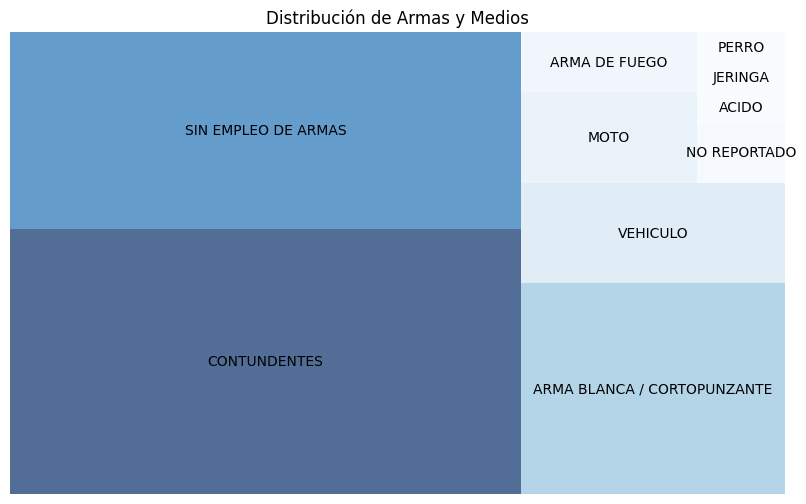

In [15]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Normalizar los valores de 'conteo' para generar un degradado de azules
norm = plt.Normalize(df_agrupado['conteo'].min(), df_agrupado['conteo'].max())
colors = [plt.cm.Blues(norm(value)) for value in df_agrupado['conteo']]

# Crear el diagrama de árbol (treemap)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df_agrupado['conteo'], label=df_agrupado['armas_medios'], color=colors, alpha=0.7)

# Agregar título
plt.title('Distribución de Armas y Medios')

# Quitar ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

In [7]:
df_agrupado = df_medellin.groupby('genero').size().reset_index(name='conteo')

# Ordenar de mayor a menor según 'conteo'
df_agrupado = df_agrupado.sort_values(by='conteo', ascending=False)

print(df_agrupado)

      genero  conteo
1  MASCULINO      80
0   FEMENINO      55


In [8]:
df_agrupado = df_medellin.groupby('grupo_etario').size().reset_index(name='conteo')

# Ordenar de mayor a menor según 'conteo'
df_agrupado = df_agrupado.sort_values(by='conteo', ascending=False)

print(df_agrupado)

   grupo_etario  conteo
1       ADULTOS     125
0  ADOLESCENTES       9
2       MENORES       1


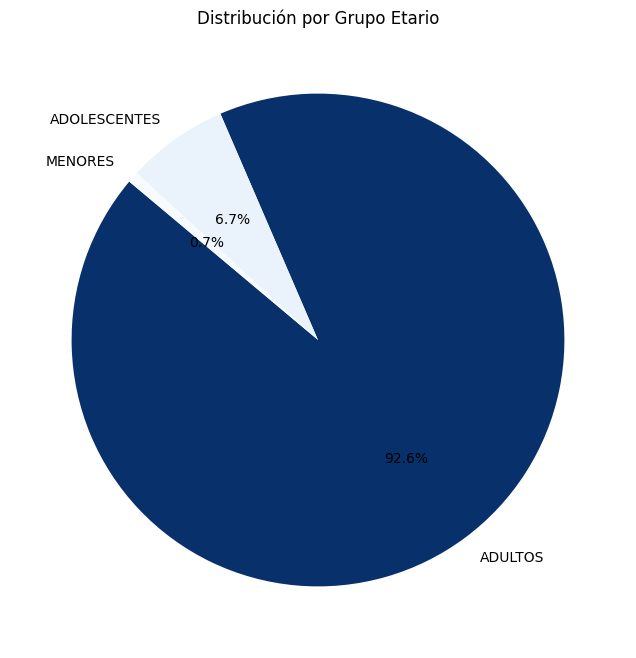

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que df_agrupado ya está definido
# df_agrupado = df_medellin.groupby('grupo_etario').size().reset_index(name='conteo')
# df_agrupado = df_agrupado.sort_values(by='conteo', ascending=False)

# Crear un degradado de azules basado en los valores de 'conteo'
norm = plt.Normalize(df_agrupado['conteo'].min(), df_agrupado['conteo'].max())
colors = plt.cm.Blues(norm(df_agrupado['conteo']))

# Crear el gráfico de torta con degradado de azules
plt.figure(figsize=(8, 8))
plt.pie(df_agrupado['conteo'], labels=df_agrupado['grupo_etario'], autopct='%1.1f%%', startangle=140, colors=colors)

# Agregar título
plt.title('Distribución por Grupo Etario')

# Mostrar el gráfico
plt.show()

In [11]:
df_agrupado = df_medellin.groupby('fecha_hecho').size().reset_index(name='conteo')

# Ordenar de mayor a menor según 'conteo'
df_agrupado = df_agrupado.sort_values(by='conteo', ascending=False)

print(df_agrupado)

   fecha_hecho  conteo
7   15/01/2021      11
15  22/01/2021      10
1    1/01/2021       8
8   16/01/2021       8
24   6/01/2021       7
14  21/01/2021       6
16  23/01/2021       6
10  18/01/2021       6
6   14/01/2021       6
9   17/01/2021       5
21   3/01/2021       5
11  19/01/2021       5
2   10/01/2021       5
25   7/01/2021       4
13  20/01/2021       4
4   12/01/2021       4
3   11/01/2021       4
23   5/01/2021       4
18  25/01/2021       4
19  26/01/2021       4
22   4/01/2021       4
27   9/01/2021       3
17  24/01/2021       3
5   13/01/2021       3
12   2/01/2021       2
26   8/01/2021       2
20  27/01/2021       1
0   05/01/2024       1


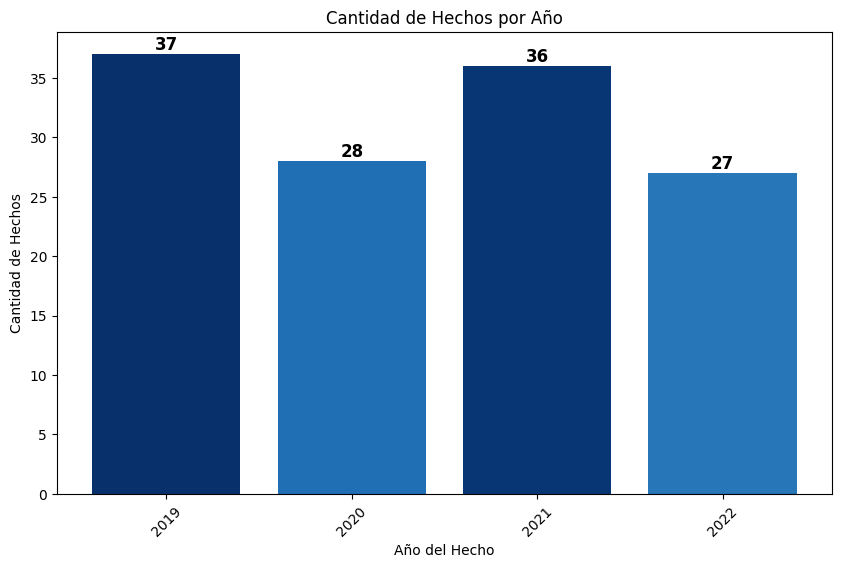

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear DataFrame de ejemplo
data = {
    "fecha_hecho": ["2019", "2020", "2021", "2022"],
    "conteo": [37, 28, 36, 27]
}
df_agrupado_anio = pd.DataFrame(data)

# Convertir la columna de fechas a string para graficar
df_agrupado_anio['fecha_hecho'] = df_agrupado_anio['fecha_hecho'].astype(str)

# Crear el gráfico de barras con colores degradados
plt.figure(figsize=(10, 6))

# Normalizar los valores de conteo para asignar intensidad de color
max_conteo = df_agrupado_anio['conteo'].max()
colors = plt.cm.Blues(df_agrupado_anio['conteo'] / max_conteo)  # Degradado de azul

bars = plt.bar(df_agrupado_anio['fecha_hecho'], df_agrupado_anio['conteo'], color=colors)

# Agregar etiquetas de conteo en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Etiquetas y título
plt.xlabel('Año del Hecho')
plt.ylabel('Cantidad de Hechos')
plt.title('Cantidad de Hechos por Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura

# Mostrar el gráfico
plt.show()